## CAI - Lab 9
#### Gerard Comas & Laura García

In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random

In [30]:
def create_ER_graph(n, eps, a, b, random_seed, plot=False):
    random.seed(random_seed)

    p_lb, p_ub = (1-eps)*np.log(n)/n, (1+eps)*np.log(n)/n
    p = a*p_lb + b*p_ub

    g = ig.Graph.Erdos_Renyi(n, p)
    g.vs['color'] = 'lightgrey'
    g.vs['alpha'] = None

    while 0 in g.degree():
        g = ig.Graph.Erdos_Renyi(n, p)
        g.vs['color'] = 'lightgrey'

    if plot:
        fig, ax = plt.subplots()
        ig.plot(
            g,
            target=ax,
            vertex_size=10
        )
    
    return g

In [29]:
def create_BA_graph(n, m, random_seed, plot=False):
    random.seed(random_seed)

    g = ig.Graph.Barabasi(n, m)
    g.vs['color'] = 'lightgrey'
    g.vs['alpha'] = None

    while 0 in g.degree():
        g = ig.Graph.Barabasi(n, m)
        g.vs['color'] = 'lightgrey'

    if plot:
        fig, ax = plt.subplots()
        ig.plot(
            g,
            target=ax,
            vertex_size=10
        )
    
    return g

In [3]:
def create_WS_graph(n, d, p, random_seed, plot=False):
    """
    n := number of nodes
    d := number of connected neigbours in each side -> 2d is the initial degree of each node (and the expected degree of a node)
    p := probability with which an edge will change one of its nodes
    """
    random.seed(random_seed)

    g = ig.Graph.Watts_Strogatz(1, n, d, p)
    g.vs['color'] = 'lightgrey'
    g.vs['alpha'] = None

    while 0 in g.degree():
        g = ig.Graph.Watts_Strogatz(1, n, d, p)
        g.vs['color'] = 'lightgrey'

    if plot:
        fig, ax = plt.subplots()
        ig.plot(
            g,
            target=ax,
            vertex_size=10
        )
    
    return g

In [4]:
def choose_zero_patient(g, zp_mode, zp_rk = None):
    if zp_mode == 'random':
        return 0
    elif zp_mode == 'closeness_centrality':
        cl = g.closeness()

        if zp_rk == 'max':
            return cl.index(max(cl))
        elif zp_rk == 'min':
            return cl.index(min(cl))
        else:
            raise Exception('No valid rank for zero patient.')
    elif zp_mode == 'degree_centrality':
        deg = g.degree()

        if zp_rk == 'max':
            return deg.index(max(deg))
        elif zp_rk == 'min':
            return deg.index(min(deg))
        else:
            raise Exception('No valid rank for zero patient.')
    elif zp_mode == 'betweenness_centrality':
        bet = g.betweenness()

        if zp_rk == 'max':
            return bet.index(max(bet))
        elif zp_rk == 'min':
            return bet.index(min(bet))
        else:
            raise Exception('No valid rank for zero patient.')
    else:
        raise Exception('No valid mode for zero patient.')

In [37]:
def spread(g, alpha, zp_mode ='random', zp_rk=None, alpha_factor = 1, total_time = 100, plot=False):
    g.vs['Infected'] = False

    zp = choose_zero_patient(g, zp_mode, zp_rk)
    g.vs[zp]['color'] = 'red'
    g.vs[zp]['Infected'] = True
    g.vs[zp]['alpha'] = alpha

    Infected = np.array([1/g.vcount()])
    count = 1

    for i in range(total_time-1):
        infected_g = g.vs.select(Infected=True)

        for v in infected_g:
            neighbours = g.vs[v.index].neighbors()
            g.vs[v.index]['alpha'] *= alpha_factor
            for u in neighbours:
                if (not g.vs[u.index]['Infected']) and (random.random() < g.vs[v.index]['alpha']):
                    g.vs[u.index]['Infected'] = True
                    g.vs[u.index]['color'] = 'green'
                    g.vs[u.index]['alpha'] = alpha
                    count += 1

        Infected = np.append(Infected, [count/g.vcount()])

        if plot:
            fig, ax = plt.subplots()
            ig.plot(
                g,
                target=ax,
                vertex_size=10
            )
            plt.show()

        # if count == g.vcount():
        #     break

    Time = np.arange(len(Infected))

    return Time, Infected

### Experiments

#### ER Graphs

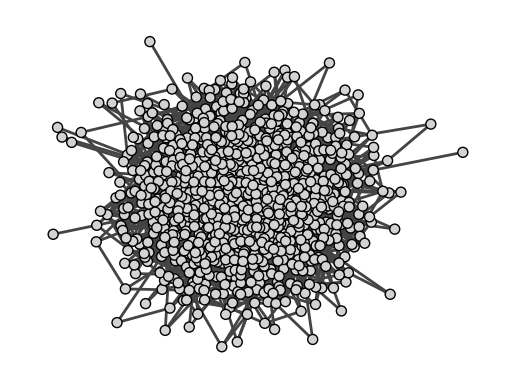

In [53]:
gER = create_ER_graph(1000, 0.005, 0.3, 0.7, 123, plot=True)
# gER = create_ER_graph(10, 0.005, 0.3, 0.7, 123456, plot=True)
# gER = create_ER_graph(100, 0.005, 0.3, 0.7, 123, plot=True)

**1. How does choosing the zero patient affect the spread of the disease?**

In [54]:
t_random, inf_random = spread(gER, 0.4) # Random zero patient
t_min_closeness, inf_min_closeness = spread(gER, 0.4, zp_mode='closeness_centrality', zp_rk='min')
t_max_closeness, inf_max_closeness = spread(gER, 0.4, zp_mode='closeness_centrality', zp_rk='max')
t_min_degree, inf_min_degree = spread(gER, 0.4, zp_mode='degree_centrality', zp_rk='min')
t_max_degree, inf_max_degree = spread(gER, 0.4, zp_mode='degree_centrality', zp_rk='max')
t_min_betwenness, inf_min_betwenness = spread(gER, 0.4, zp_mode='betweenness_centrality', zp_rk='min')
t_max_betwenness, inf_max_betwenness = spread(gER, 0.4, zp_mode='betweenness_centrality', zp_rk='max')

Text(0.5, 1.0, 'Infection spread across graph nodes')

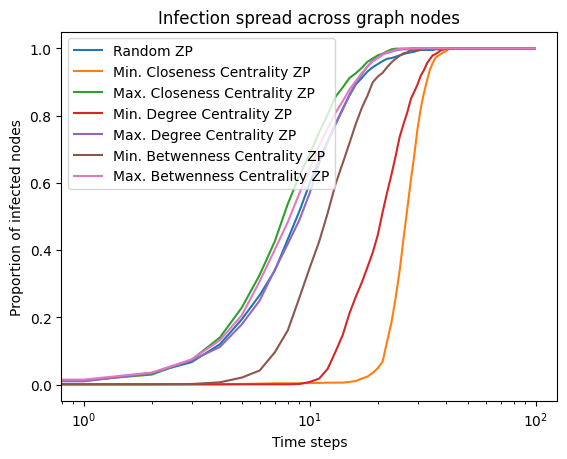

In [115]:
fig, ax = plt.subplots()
ax.plot(t_random, inf_random, label='Random ZP')
ax.plot(t_min_closeness, inf_min_closeness, label='Min. Closeness Centrality ZP')
ax.plot(t_max_closeness, inf_max_closeness, label='Max. Closeness Centrality ZP')
ax.plot(t_min_degree, inf_min_degree, label='Min. Degree Centrality ZP')
ax.plot(t_max_degree, inf_max_degree, label='Max. Degree Centrality ZP')
ax.plot(t_min_betwenness, inf_min_betwenness, label='Min. Betwenness Centrality ZP')
ax.plot(t_max_betwenness, inf_max_betwenness, label='Max. Betwenness Centrality ZP')
ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes')

We observe that when we choose the maximum centrality node (for each centrality type), we obtain a smaller time before all the nodes in the graph have been infected. This makes sense: we'd assume that if a node is better connected to the rest of the nodes in the graph, the infection will spread faster. We also observe that for the minimum centrality (again, of each type), we'll need more time for all the nodes to be infected. With the same reasoning as before, this also makes sense and fits our expectations. When we randomly choose the zero patient, we observe kind of an average behaviour: depending on what node it is, it is bound to behave as the most/least central or as something in between.

It must be noted that for all the cases, we obtain a final infection rate of 1 (also expected given that we have a fully connnected graph).

**2. How does $\alpha$ affect the spread of the disease through the network?**

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

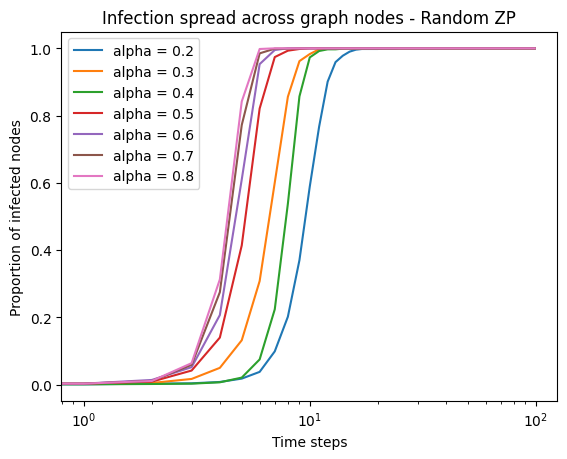

In [81]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gER, a) # Random zero patient
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Max. Closeness Centrality ZP')

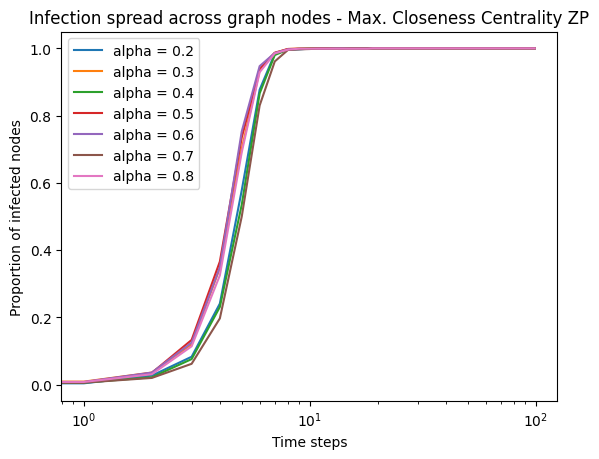

In [82]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gER, 0.4, zp_mode='closeness_centrality', zp_rk='max')
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Max. Closeness Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Min. Closeness Centrality ZP')

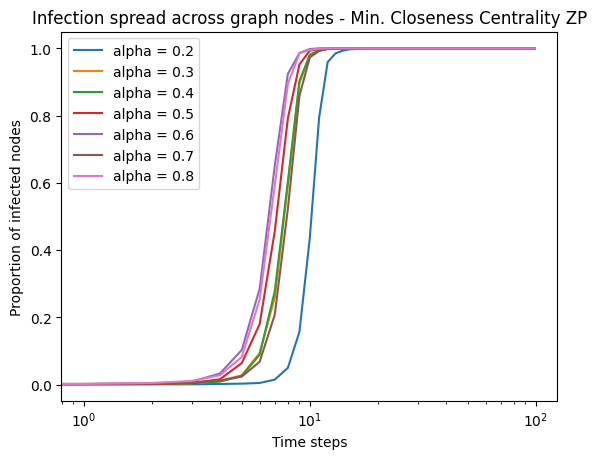

In [89]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gER, 0.4, zp_mode='closeness_centrality', zp_rk='min')
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Min. Closeness Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Max. Degree Centrality ZP')

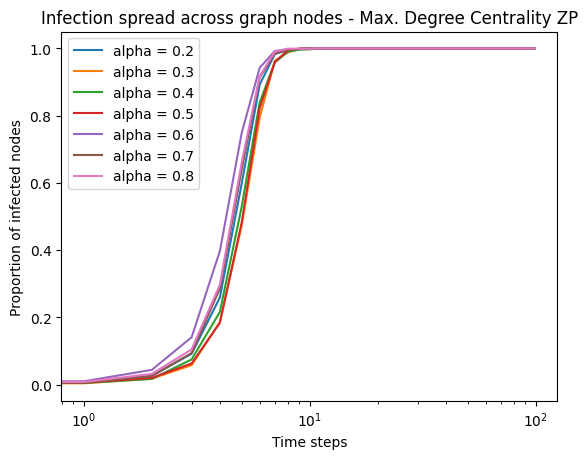

In [83]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gER, 0.4, zp_mode='degree_centrality', zp_rk='max')
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Max. Degree Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Min. Degree Centrality ZP')

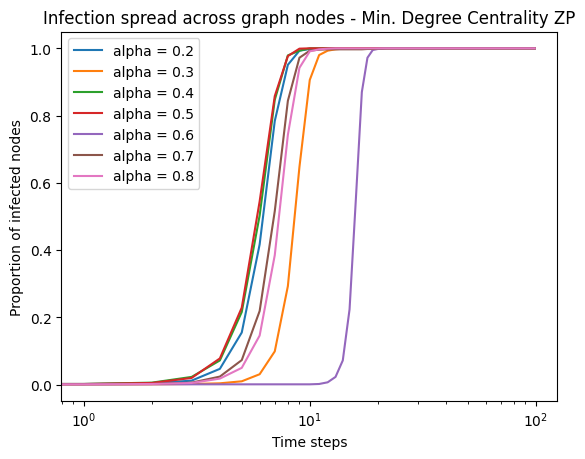

In [90]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gER, 0.4, zp_mode='degree_centrality', zp_rk='min')
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Min. Degree Centrality ZP')

**3. Does modifying $\alpha$ through out the simulation change the spreading of the infection?**

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

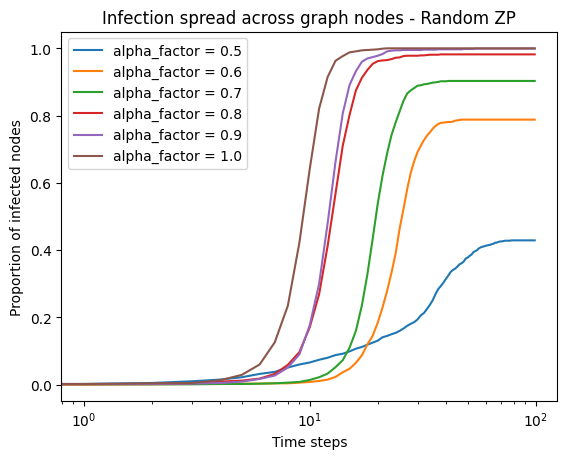

In [94]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gER, 0.2, alpha_factor=a_factor) # Random zero patient
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Max. Closeness Centrality ZP')

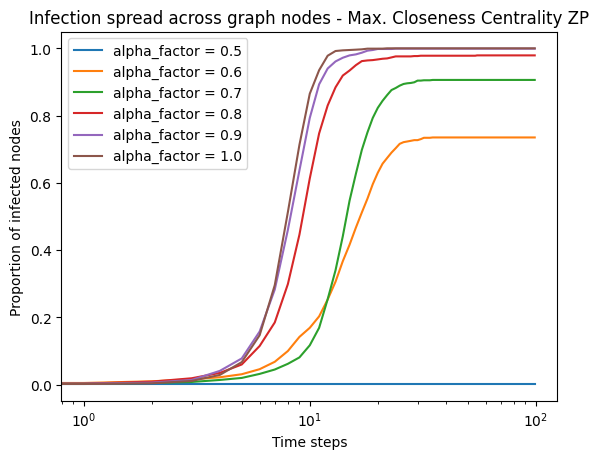

In [96]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gER, 0.2, alpha_factor=a_factor, zp_mode='closeness_centrality', zp_rk='max')
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Max. Closeness Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Min. Closeness Centrality ZP')

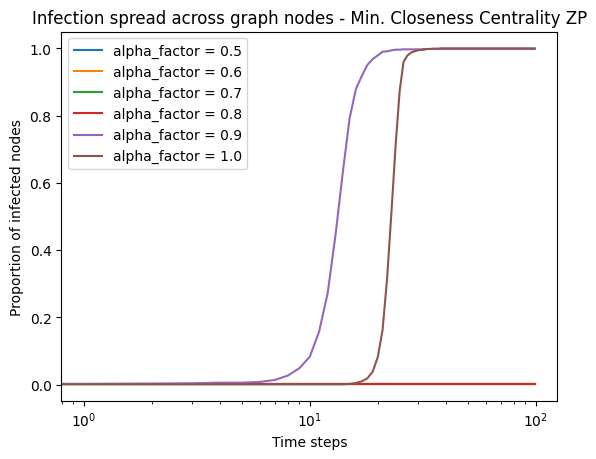

In [97]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gER, 0.2, alpha_factor=a_factor, zp_mode='closeness_centrality', zp_rk='min')
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Min. Closeness Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Max. Degree Centrality ZP')

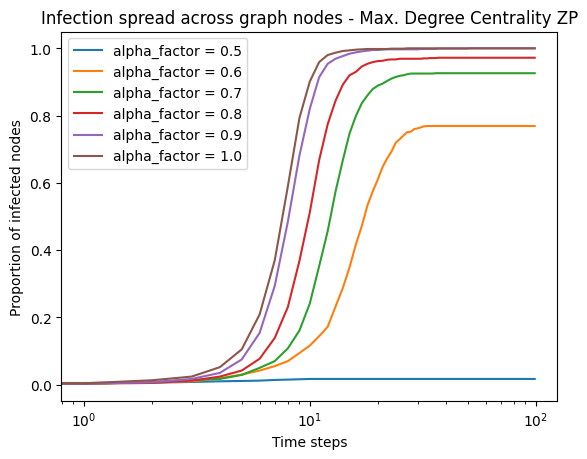

In [98]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gER, 0.2, alpha_factor=a_factor, zp_mode='degree_centrality', zp_rk='max')
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Max. Degree Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Min. Degree Centrality ZP')

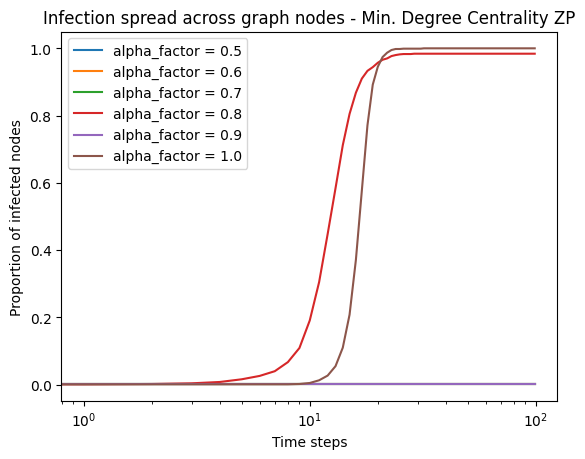

In [99]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gER, 0.2, alpha_factor=a_factor, zp_mode='degree_centrality', zp_rk='min')
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Min. Degree Centrality ZP')

#### BA Graphs

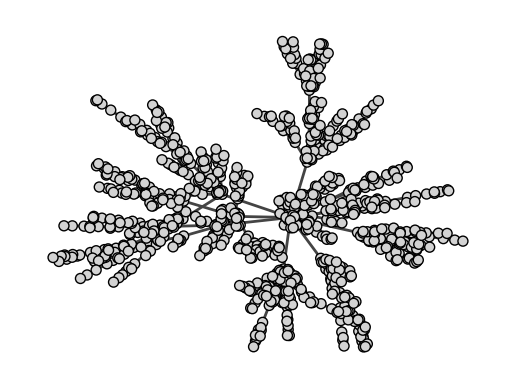

In [105]:
gBA = create_BA_graph(1000, 1, 123, plot=True)

**1. Does changing the zero patient have any effect on the dynamics of the system?**

Text(0.5, 1.0, 'Infection spread across graph nodes')

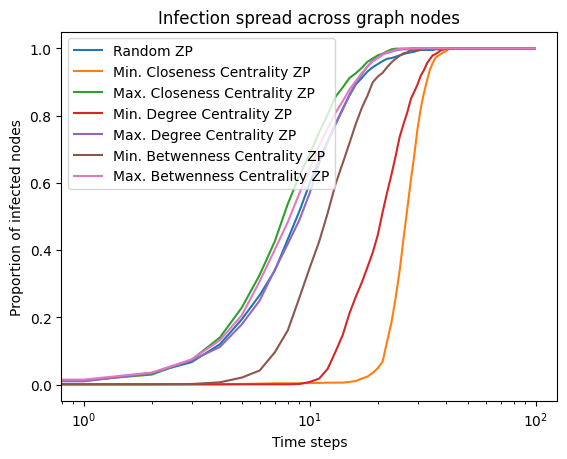

In [111]:
t_random, inf_random = spread(gBA, 0.4) # Random zero patient
t_min_closeness, inf_min_closeness = spread(gBA, 0.4, zp_mode='closeness_centrality', zp_rk='min')
t_max_closeness, inf_max_closeness = spread(gBA, 0.4, zp_mode='closeness_centrality', zp_rk='max')
t_min_degree, inf_min_degree = spread(gBA, 0.4, zp_mode='degree_centrality', zp_rk='min')
t_max_degree, inf_max_degree = spread(gBA, 0.4, zp_mode='degree_centrality', zp_rk='max')
t_min_betwenness, inf_min_betwenness = spread(gBA, 0.4, zp_mode='betweenness_centrality', zp_rk='min')
t_max_betwenness, inf_max_betwenness = spread(gBA, 0.4, zp_mode='betweenness_centrality', zp_rk='max')

fig, ax = plt.subplots()
ax.plot(t_random, inf_random, label='Random ZP')
ax.plot(t_min_closeness, inf_min_closeness, label='Min. Closeness Centrality ZP')
ax.plot(t_max_closeness, inf_max_closeness, label='Max. Closeness Centrality ZP')
ax.plot(t_min_degree, inf_min_degree, label='Min. Degree Centrality ZP')
ax.plot(t_max_degree, inf_max_degree, label='Max. Degree Centrality ZP')
ax.plot(t_min_betwenness, inf_min_betwenness, label='Min. Betwenness Centrality ZP')
ax.plot(t_max_betwenness, inf_max_betwenness, label='Max. Betwenness Centrality ZP')
ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes')

**2. What happens when we change $m$?**

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

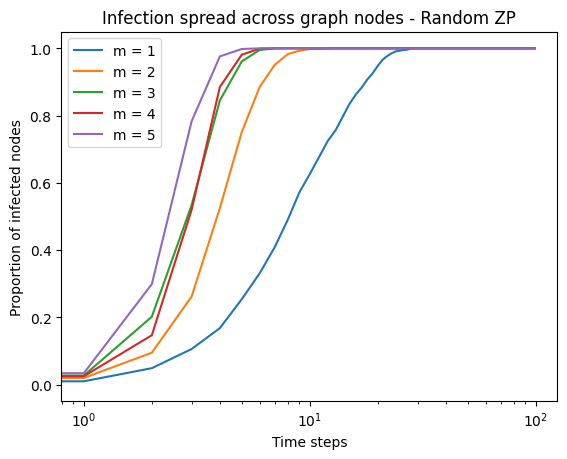

In [112]:
fig, ax = plt.subplots()

for m in range(1, 6):
    gBA = create_BA_graph(1000, m, 123)
    t, inf = spread(gBA, 0.4) # Random zero patient
    ax.plot(t, inf, label='m = ' + str(m))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Max. Degree Centrality ZP')

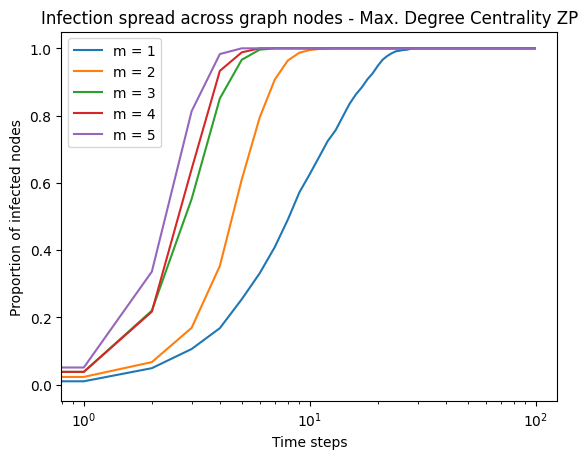

In [113]:
fig, ax = plt.subplots()

for m in range(1, 6):
    gBA = create_BA_graph(1000, m, 123)
    t, inf = spread(gBA, 0.4, zp_mode='degree_centrality', zp_rk='max')
    ax.plot(t, inf, label='m = ' + str(m))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Max. Degree Centrality ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Min. Degree Centrality ZP')

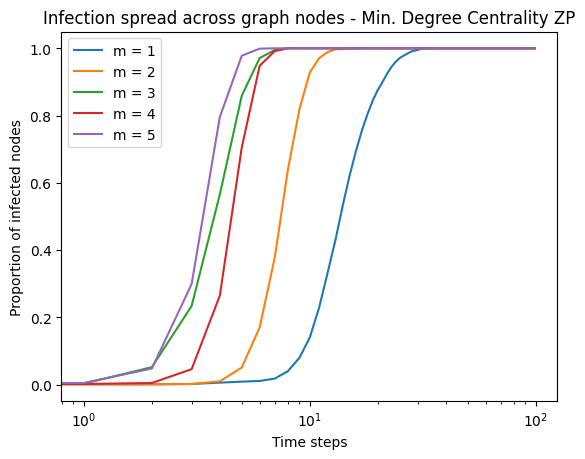

In [114]:
fig, ax = plt.subplots()

for m in range(1, 6):
    gBA = create_BA_graph(1000, m, 123)
    t, inf = spread(gBA, 0.4, zp_mode='degree_centrality', zp_rk='min')
    ax.plot(t, inf, label='m = ' + str(m))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Min. Degree Centrality ZP')

**3. What happens when we change $\alpha$ and the $\alpha_{factor}$?**

In [31]:
gBA = create_BA_graph(1000, 1, 123)

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

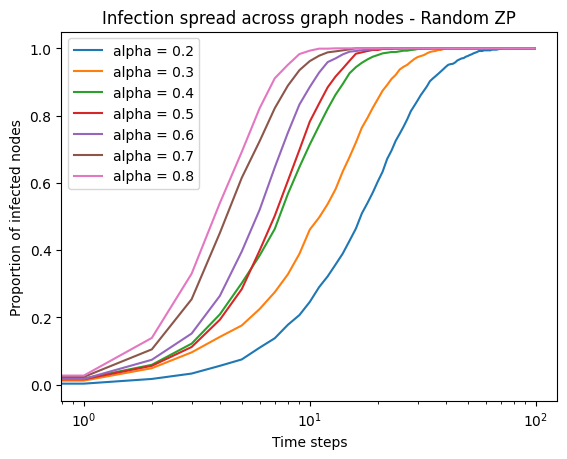

In [32]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gBA, a) # Random zero patient
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

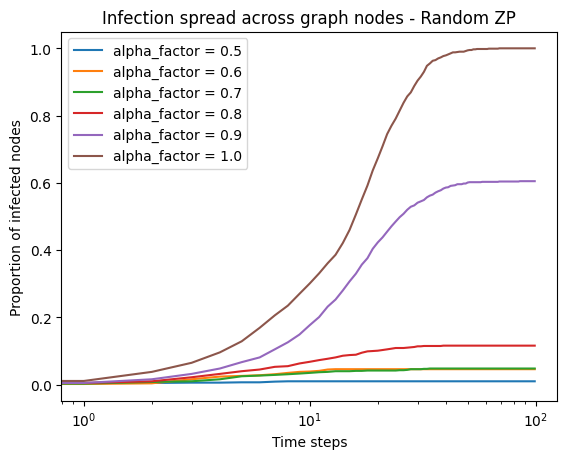

In [33]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gBA, 0.2, alpha_factor=a_factor) # Random zero patient
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

#### WS Graphs

In this case, we'll want to see how having (local) clusters in the graph will affect the spread of an infection through the network. We will expect for the infection to spread fast across the clusters once a node is infected, but then for it to slow down before infecting nodes in other clusters (it will need to "reach the limit node of a cluster" first).

We probably ought to try using different values of $d$ (will give networks with higher clustering coefficient) and also different values of $p$ (will give networks with smaller diameter). We'll want to consider how both parameters affect the spread of an infection.

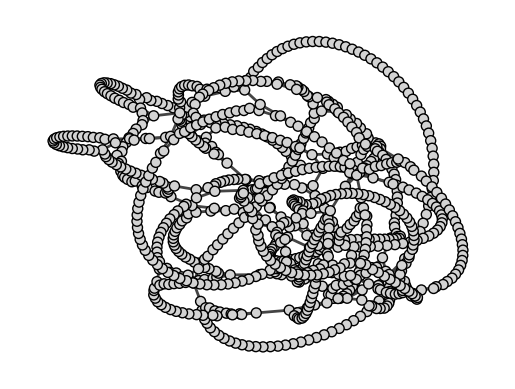

In [27]:
gWS = create_WS_graph(1000, 2, 0.01, 123, plot=True)

**1. What changes do we observe when we change the zero patient?**

Text(0.5, 1.0, 'Infection spread across graph nodes')

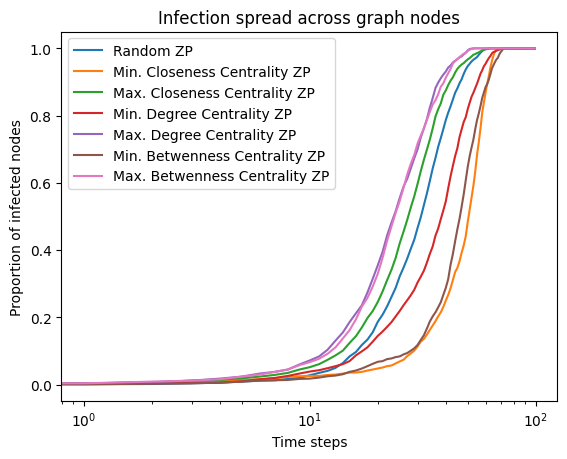

In [28]:
t_random, inf_random = spread(gWS, 0.4) # Random zero patient
t_min_closeness, inf_min_closeness = spread(gWS, 0.4, zp_mode='closeness_centrality', zp_rk='min')
t_max_closeness, inf_max_closeness = spread(gWS, 0.4, zp_mode='closeness_centrality', zp_rk='max')
t_min_degree, inf_min_degree = spread(gWS, 0.4, zp_mode='degree_centrality', zp_rk='min')
t_max_degree, inf_max_degree = spread(gWS, 0.4, zp_mode='degree_centrality', zp_rk='max')
t_min_betwenness, inf_min_betwenness = spread(gWS, 0.4, zp_mode='betweenness_centrality', zp_rk='min')
t_max_betwenness, inf_max_betwenness = spread(gWS, 0.4, zp_mode='betweenness_centrality', zp_rk='max')

fig, ax = plt.subplots()
ax.plot(t_random, inf_random, label='Random ZP')
ax.plot(t_min_closeness, inf_min_closeness, label='Min. Closeness Centrality ZP')
ax.plot(t_max_closeness, inf_max_closeness, label='Max. Closeness Centrality ZP')
ax.plot(t_min_degree, inf_min_degree, label='Min. Degree Centrality ZP')
ax.plot(t_max_degree, inf_max_degree, label='Max. Degree Centrality ZP')
ax.plot(t_min_betwenness, inf_min_betwenness, label='Min. Betwenness Centrality ZP')
ax.plot(t_max_betwenness, inf_max_betwenness, label='Max. Betwenness Centrality ZP')
ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes')

**2. What happens if we change the parameters of the graph $d$ and $p$?**

Text(0.5, 0.98, 'Infection spread across graph nodes - Random ZP')

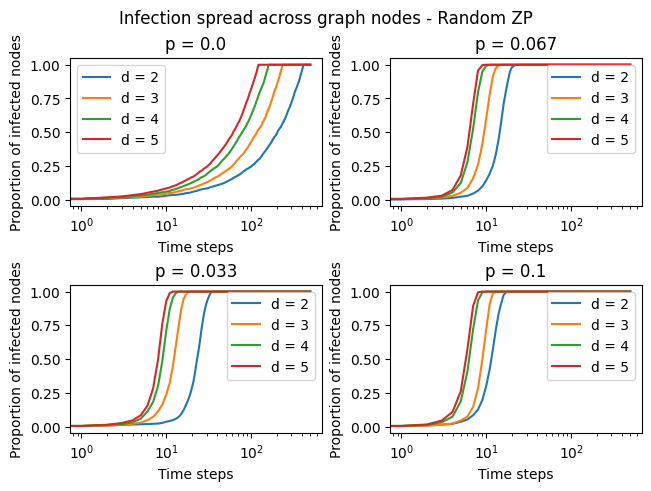

In [55]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 4):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, 123)
        t, inf = spread(gWS, 0.4, total_time=500)
        ax[i%2, (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[i%2, (i//2)%2].legend()
        ax[i%2, (i//2)%2].set_xlabel('Time steps')
        ax[i%2, (i//2)%2].set_xscale('log')
        ax[i%2, (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[i%2, (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Random ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Max. Closeness Centrality ZP')

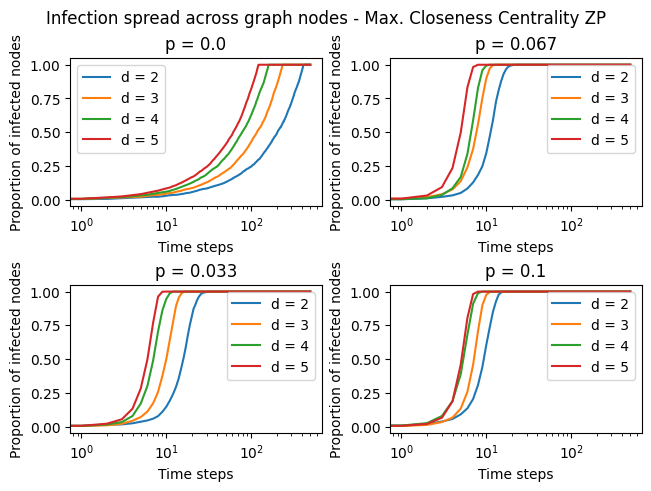

In [64]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 4):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)
        t, inf = spread(gWS, 0.4, zp_mode='closeness_centrality', zp_rk='max', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Max. Closeness Centrality ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Min. Closeness Centrality ZP')

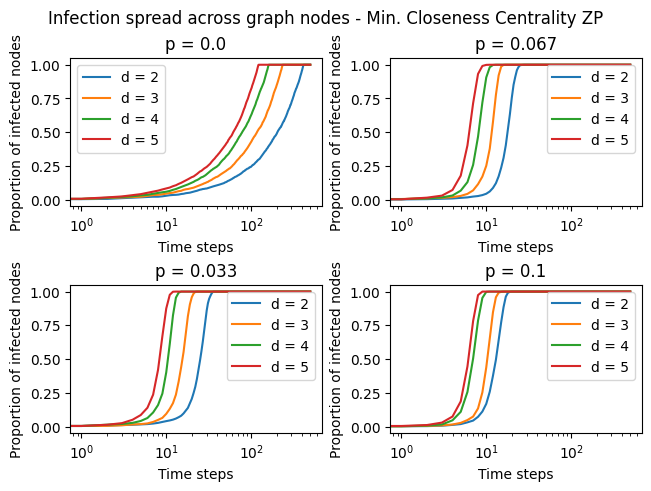

In [65]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 4):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)
        t, inf = spread(gWS, 0.4, zp_mode='closeness_centrality', zp_rk='min', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Min. Closeness Centrality ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Max. Degree Centrality ZP')

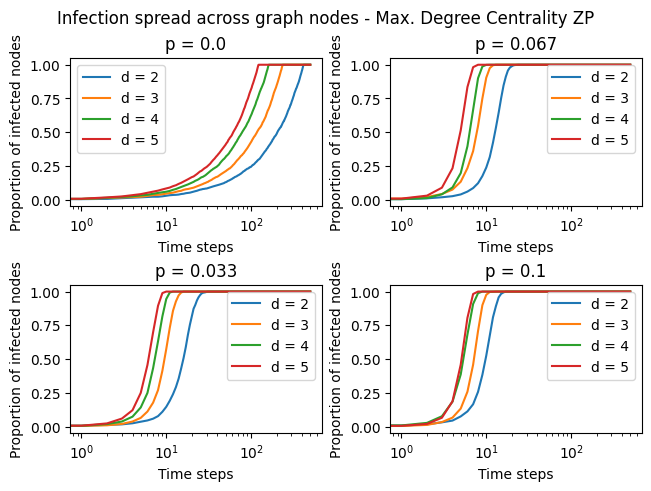

In [66]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 4):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)
        t, inf = spread(gWS, 0.4, zp_mode='degree_centrality', zp_rk='max', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Max. Degree Centrality ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Min. Degree Centrality ZP')

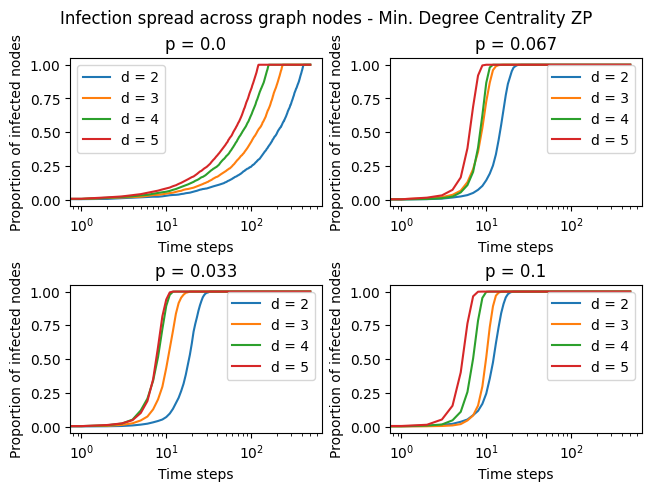

In [69]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 4):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)

        t, inf = spread(gWS, 0.4, zp_mode='degree_centrality', zp_rk='min', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Min. Degree Centrality ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Max. Betwenness Centrality ZP')

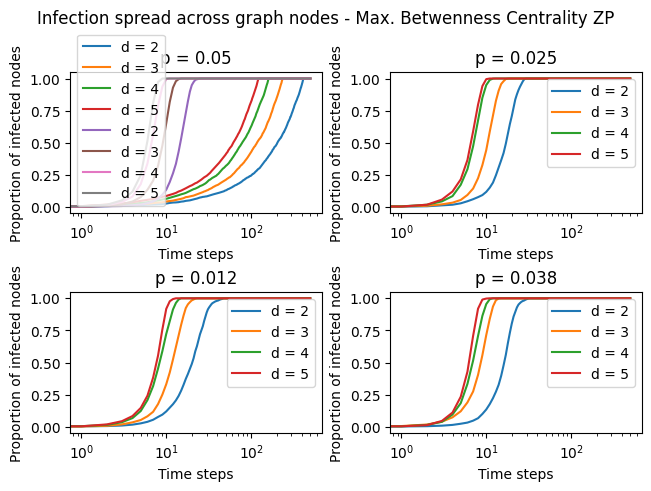

In [70]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.05, 5):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)

        t, inf = spread(gWS, 0.4, zp_mode='betweenness_centrality', zp_rk='max', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Max. Betwenness Centrality ZP')

Text(0.5, 0.98, 'Infection spread across graph nodes - Min. Betwenness Centrality ZP')

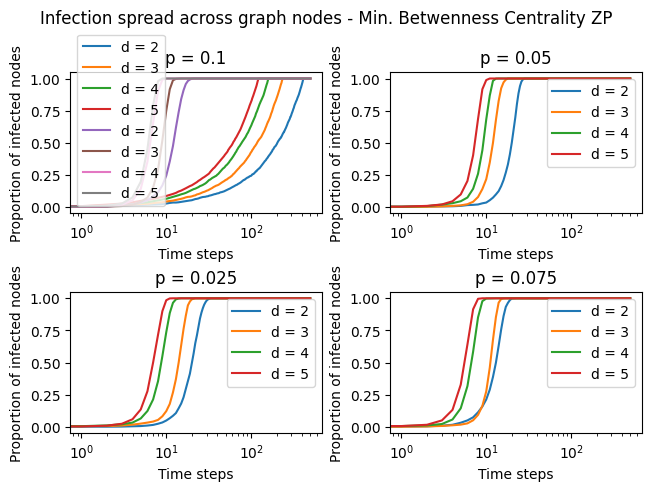

In [71]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

i = 0
for p in np.linspace(0, 0.1, 5):
    for d in range(2, 6):
        gWS = create_WS_graph(1000, d, p, random_seed=123)

        t, inf = spread(gWS, 0.4, zp_mode='betweenness_centrality', zp_rk='min', total_time=500)
        ax[(i%2), (i//2)%2].plot(t, inf, label='d = ' + str(d))

        ax[(i%2), (i//2)%2].legend()
        ax[(i%2), (i//2)%2].set_xlabel('Time steps')
        ax[(i%2), (i//2)%2].set_xscale('log')
        ax[(i%2), (i//2)%2].set_ylabel('Proportion of infected nodes')
        ax[(i%2), (i//2)%2].set_title('p = ' + str(round(p, 3)))
    
    i += 1

fig.suptitle('Infection spread across graph nodes - Min. Betwenness Centrality ZP')

**3. What happens if we change $\alpha$ and $\alpha_{factor}$?**

In [73]:
gWS = create_WS_graph(1000, 2, 0.01, 123)

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

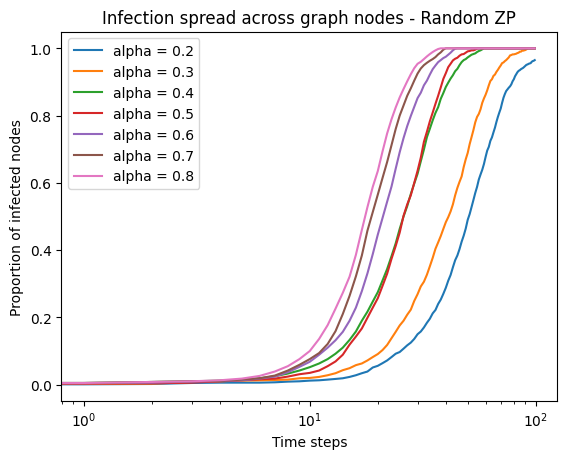

In [74]:
fig, ax = plt.subplots()

for a in np.linspace(0.2, 0.8, 7):
    t, inf = spread(gWS, a) # Random zero patient
    ax.plot(t, inf, label='alpha = ' + str(round(a, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')

Text(0.5, 1.0, 'Infection spread across graph nodes - Random ZP')

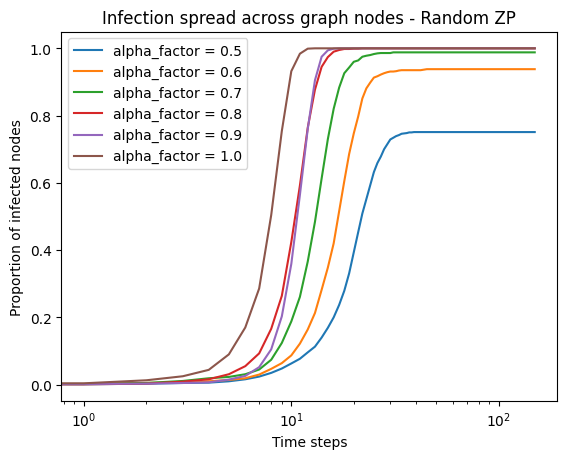

In [50]:
fig, ax = plt.subplots()

for a_factor in np.linspace(0.5, 1, 6):
    t, inf = spread(gWS, 0.2, alpha_factor=a_factor) # Random zero patient
    ax.plot(t, inf, label='alpha_factor = ' + str(round(a_factor, 3)))

ax.legend()
ax.set_xlabel('Time steps')
ax.set_xscale('log')
ax.set_ylabel('Proportion of infected nodes')
ax.set_title('Infection spread across graph nodes - Random ZP')